In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#We are working on three major tables
log_visit = pd.read_csv('exported_tables/matomo_log_visit.csv', on_bad_lines='skip', index_col=False)
log_link_visit = pd.read_csv('exported_tables/matomo_log_link_visit_action.csv', index_col = False)
log_action = pd.read_csv('exported_tables/matomo_log_action.csv', index_col=False)

In [4]:
print(log_visit.shape, log_link_visit.shape, log_action.shape)

(1000, 60) (1000, 41) (1000, 5)


In [5]:
log_visit.columns

Index(['idvisit', 'idsite', 'idvisitor', 'visit_last_action_time', 'config_id',
       'location_ip', 'profilable', 'user_id', 'visit_first_action_time',
       'visit_goal_buyer', 'visit_goal_converted', 'visitor_returning',
       'visitor_seconds_since_first', 'visitor_seconds_since_order',
       'visitor_count_visits', 'visit_entry_idaction_name',
       'visit_entry_idaction_url', 'visit_exit_idaction_name',
       'visit_exit_idaction_url', 'visit_total_actions',
       'visit_total_interactions', 'visit_total_searches', 'referer_keyword',
       'referer_name', 'referer_type', 'referer_url', 'location_browser_lang',
       'config_browser_engine', 'config_browser_name',
       'config_browser_version', 'config_client_type', 'config_device_brand',
       'config_device_model', 'config_device_type', 'config_os',
       'config_os_version', 'visit_total_events', 'visitor_localtime',
       'visitor_seconds_since_last', 'config_resolution', 'config_cookie',
       'config_flash', '

In [6]:
visit_null_column = ['idvisitor', 'config_id', 'location_ip', 'user_id', 'profilable', 'custom_dimension_1',
                     'custom_dimension_2', 'custom_dimension_3', 'custom_dimension_4', 'custom_dimension_5', 'config_browser_engine',
                     'config_flash', 'config_java', 'config_pdf', 'config_quicktime', 'location_browser_lang', 'config_browser_name',
                     'config_browser_version', 'config_device_brand', 'config_os_version', 'config_cookie', 'location_latitude', 'location_longitude',
                     'config_realplayer', 'config_silverlight', 'config_windowsmedia', 'config_os_version']
log_visit.drop(columns=visit_null_column, inplace=True)

In [7]:
useful_columns_empty = ['visit_goal_buyer', 'visit_goal_converted', 'visitor_seconds_since_order',
                        'last_idlink_va', 'referer_keyword', 'config_client_type', 'visit_total_events', 'visit_total_searches']
log_visit_refine = log_visit.drop(columns = useful_columns_empty)
log_visit_refine['visit_entry_idaction_url'] = log_visit_refine['visit_entry_idaction_url'].fillna(0).astype('int64')

In [8]:
log_visit_refine['visitor_returning'].value_counts()

visitor_returning
1    812
0    188
Name: count, dtype: int64

In [9]:
log_visit_refine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   idvisit                      1000 non-null   int64 
 1   idsite                       1000 non-null   int64 
 2   visit_last_action_time       1000 non-null   object
 3   visit_first_action_time      1000 non-null   object
 4   visitor_returning            1000 non-null   int64 
 5   visitor_seconds_since_first  1000 non-null   int64 
 6   visitor_count_visits         1000 non-null   int64 
 7   visit_entry_idaction_name    1000 non-null   int64 
 8   visit_entry_idaction_url     1000 non-null   int64 
 9   visit_exit_idaction_name     1000 non-null   int64 
 10  visit_exit_idaction_url      1000 non-null   int64 
 11  visit_total_actions          1000 non-null   int64 
 12  visit_total_interactions     1000 non-null   int64 
 13  referer_name                 14 no

In [10]:
log_link_visit.info()
llv_null_columns = [
       'custom_float', 'search_cat', 'search_count', 'idaction_product_cat',
       'idaction_product_cat2', 'idaction_product_cat3', 'idlink_va',
       'idaction_product_cat4', 'idaction_product_cat5',
       'idaction_product_name', 'product_price', 'idaction_product_sku',
       'idaction_event_action', 'idaction_event_category',
       'idaction_content_interaction', 'idaction_content_name',
       'idaction_content_piece', 'idaction_content_target', 'time_spent',
       'custom_dimension_1', 'custom_dimension_2', 'custom_dimension_3',
       'custom_dimension_4', 'custom_dimension_5', 'idvisitor']
log_link_visit.drop(columns=llv_null_columns, inplace = True)
log_link_visit['idaction_name'] = log_link_visit['idaction_name'].fillna(0).astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idlink_va                     1000 non-null   int64  
 1   idsite                        1000 non-null   int64  
 2   idvisitor                     1000 non-null   object 
 3   idvisit                       1000 non-null   int64  
 4   idaction_url_ref              1000 non-null   int64  
 5   idaction_name_ref             1000 non-null   int64  
 6   custom_float                  0 non-null      float64
 7   pageview_position             1000 non-null   int64  
 8   server_time                   1000 non-null   object 
 9   idpageview                    1000 non-null   object 
 10  idaction_name                 998 non-null    float64
 11  idaction_url                  1000 non-null   int64  
 12  search_cat                    0 non-null      float64
 13  sear

In [12]:
log_link_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   idsite                 1000 non-null   int64  
 1   idvisit                1000 non-null   int64  
 2   idaction_url_ref       1000 non-null   int64  
 3   idaction_name_ref      1000 non-null   int64  
 4   pageview_position      1000 non-null   int64  
 5   server_time            1000 non-null   object 
 6   idpageview             1000 non-null   object 
 7   idaction_name          1000 non-null   int64  
 8   idaction_url           1000 non-null   int64  
 9   time_spent_ref_action  1000 non-null   int64  
 10  time_dom_completion    143 non-null    float64
 11  time_dom_processing    568 non-null    float64
 12  time_network           568 non-null    float64
 13  time_on_load           143 non-null    float64
 14  time_server            568 non-null    float64
 15  time_

In [13]:
log_action[log_action['idaction']==411]['name']

411    devpy.vipani.ai/order-management/create-asn/801
Name: name, dtype: object

In [14]:
(log_link_visit['idvisit'].value_counts() > 2).value_counts()

count
True     56
False    47
Name: count, dtype: int64

In [15]:
url_prefix_map = {
    0.0: 'http://',
    1.0: 'http://www.',
    2.0: 'https://',
    3.0: 'https://www.'
}

In [16]:
def build_action_display(row):
    if row['type'] in [1, 2, 3]:  # URL
        prefix = url_prefix_map.get(row['url_prefix'], '')
        return prefix + row['name']
    else:
        return row['name']  # or return row['name'] for events etc.
# log_action['action_display'] = url_prefix_map.get(log_action['url_prefix'], '')+log_action['name']

In [17]:
log_action['action_display'] = log_action.apply(build_action_display, axis=1)

In [18]:
log_action = log_action[['idaction', 'action_display']]

In [19]:
log_action['idaction']

0        1
1        2
2        3
3        4
4        5
      ... 
995    992
996    993
997    994
998    995
999    996
Name: idaction, Length: 1000, dtype: int64

In [20]:
log_link_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   idsite                 1000 non-null   int64  
 1   idvisit                1000 non-null   int64  
 2   idaction_url_ref       1000 non-null   int64  
 3   idaction_name_ref      1000 non-null   int64  
 4   pageview_position      1000 non-null   int64  
 5   server_time            1000 non-null   object 
 6   idpageview             1000 non-null   object 
 7   idaction_name          1000 non-null   int64  
 8   idaction_url           1000 non-null   int64  
 9   time_spent_ref_action  1000 non-null   int64  
 10  time_dom_completion    143 non-null    float64
 11  time_dom_processing    568 non-null    float64
 12  time_network           568 non-null    float64
 13  time_on_load           143 non-null    float64
 14  time_server            568 non-null    float64
 15  time_

In [21]:
# Step 1: Create a mapping dictionary
id_to_display = log_action.set_index('idaction')['action_display']
id_to_display[0] = "Not Found"
id_to_display = id_to_display.to_dict()

# Step 2: Map it safely
log_link_visit['previous_link'] = log_link_visit['idaction_url_ref'].map(id_to_display)
log_link_visit['previous_page'] = log_link_visit['idaction_name_ref'].map(id_to_display)
log_link_visit['current_link'] = log_link_visit['idaction_url'].map(id_to_display)
log_link_visit['current_page'] = log_link_visit['idaction_name'].map(id_to_display)

In [22]:
log_link_visit.drop(columns=['idaction_url_ref', 'idaction_name_ref', 'idaction_name', 'idaction_url'], inplace=True)

In [23]:
# Merge the two tables on 'idvisit'
merged_df = log_link_visit.merge(
    log_visit_refine,
    on='idvisit',
    how='left'  # 'left' keeps all actions, adds visit data where available
)

In [24]:
merged_df

,idsite_x,idvisit,pageview_position,server_time,idpageview,time_spent_ref_action,time_dom_completion,time_dom_processing,time_network,time_on_load,...,config_device_model,config_device_type,config_os,visitor_localtime,visitor_seconds_since_last,config_resolution,visit_total_time,location_city,location_country,location_region
0,1,1,1,2025-02-21 09:50:35,edNZua,0,NaN,46.0,326.0,NaN,...,generic desktop,0.0,WIN,15:20:34,0.0,1920x1080,844.0,Mumbai,in,MH
1,1,1,2,2025-02-21 09:50:35,L3xMsC,0,NaN,23.0,305.0,NaN,...,generic desktop,0.0,WIN,15:20:34,0.0,1920x1080,844.0,Mumbai,in,MH
2,1,1,3,2025-02-21 09:50:36,Yb1iEF,1,NaN,82.0,261.0,NaN,...,generic desktop,0.0,WIN,15:20:34,0.0,1920x1080,844.0,Mumbai,in,MH
3,1,1,4,2025-02-21 09:50:40,g6VqCv,4,NaN,41.0,0.0,NaN,...,generic desktop,0.0,WIN,15:20:34,0.0,1920x1080,844.0,Mumbai,in,MH
4,1,1,5,2025-02-21 09:51:55,6I94Oo,75,NaN,106.0,315.0,NaN,...,generic desktop,0.0,WIN,15:20:34,0.0,1920x1080,844.0,Mumbai,in,MH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,101,116,2025-02-27 12:49:58,oe3oVg,0,535.0,102.0,0.0,1.0,...,generic desktop,0.0,WIN,18:01:33,0.0,1366x768,9288.0,Mumbai (Hanuman Nagar),in,MH
996,1,101,117,2025-02-27 12:50:16,3978gm,18,NaN,NaN,NaN,NaN,...,generic desktop,0.0,WIN,18:01:33,0.0,1366x768,9288.0,Mumbai (Hanuman Nagar),in,MH
997,1,101,118,2025-02-27 12:51:39,jymdNB,83,NaN,39.0,72.0,NaN,...,generic desktop,0.0,WIN,18:01:33,0.0,1366x768,9288.0,Mumbai (Hanuman Nagar),in,MH
998,1,101,119,2025-02-27 12:51:40,Nyjfqu,1,1163.0,39.0,72.0,0.0,...,generic desktop,0.0,WIN,18:01:33,0.0,1366x768,9288.0,Mumbai (Hanuman Nagar),in,MH


<Axes: xlabel='config_device_model'>

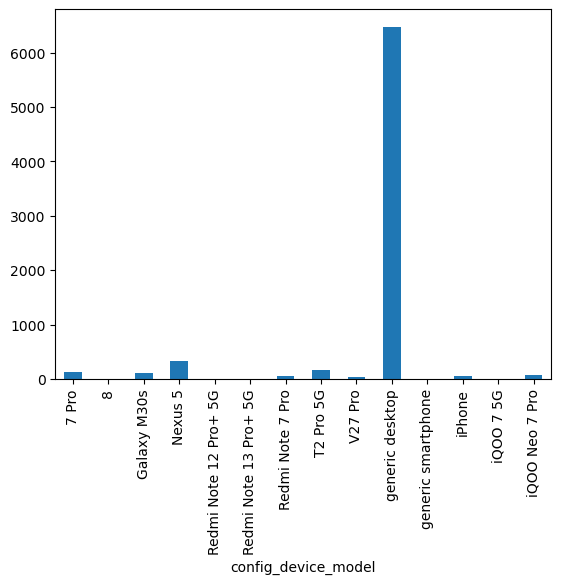

In [29]:
# Avg session time by device type
merged_df.groupby('config_device_model')['visit_total_time'].mean().plot(kind='bar')

<Axes: xlabel='config_os'>

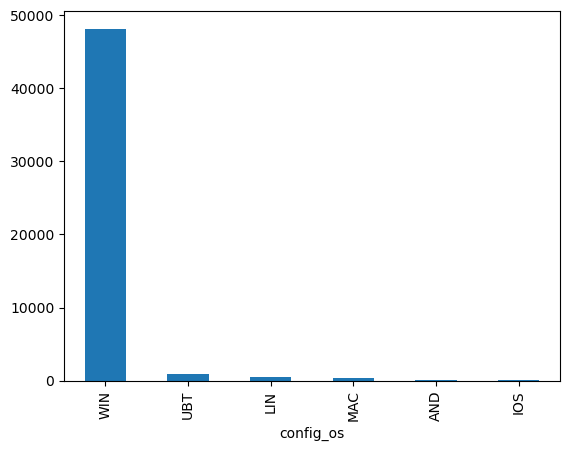

In [30]:
# Sessions by OS
merged_df['config_os'].value_counts().plot(kind='bar')

In [31]:
# Simple ordered path of pages per session
paths = merged_df.sort_values(['idvisit', 'pageview_position']).groupby('idvisit')['current_link'].apply(list)

In [162]:
paths[250]

['https://stuam.vipani.ai/',
 'https://stuam.vipani.ai/e-commerce/product-details/12141',
 'https://stuam.vipani.ai/e-commerce/search-products/boiler',
 'https://stuam.vipani.ai/e-commerce/category-four/843a83abef8e5bd14d0db71955b43991',
 'https://stuam.vipani.ai/e-commerce/product-details/68583',
 'https://stuam.vipani.ai/e-commerce/product-details/68583']

<Axes: xlabel='visitor_returning'>

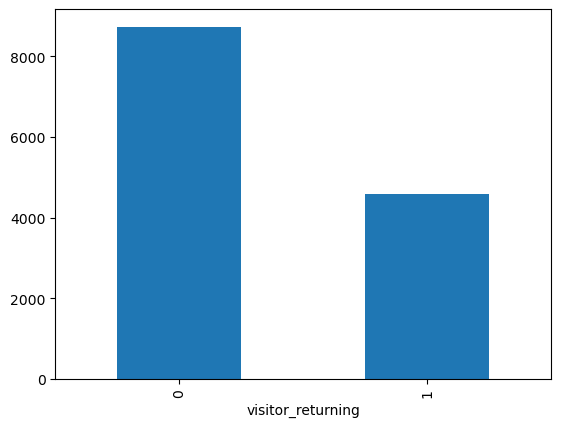

In [164]:
# Compare session duration
merged_df.groupby('visitor_returning')['visit_total_time'].mean().plot(kind='bar')

In [165]:
# Visits by city
merged_df['location_city'].value_counts().head(10)


location_city
Mumbai                    22949
Mumbai (Hanuman Nagar)    12821
Neihu District            10245
Taipei                     3494
Vepagunta                   162
Dubai                       114
Kandahar                     50
Kurnool                      26
Lucknow (Hazratganj)         23
Mumbai (Parel)               18
Name: count, dtype: int64

<Axes: xlabel='location_country'>

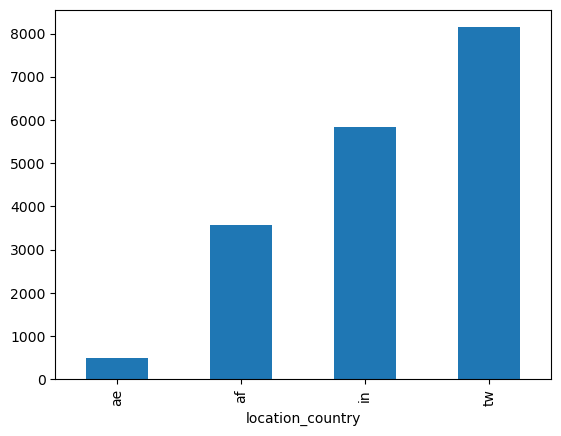

In [167]:
# Session duration by country
merged_df.groupby('location_country')['visit_total_time'].mean().plot(kind='bar')

In [168]:
# Average time spent per page
merged_df.groupby('current_link')['time_spent_ref_action'].mean().sort_values(ascending=False).head(10)

current_link
https://devpy.vipani.ai/order-management/sent-to-supplier?id=1289                    1607.000000
https://devpy.vipani.ai/rfq/buyer/rfq-seller-selection/1903                          1571.000000
https://devpy.vipani.ai/deal-room/direct/1197/chat                                   1462.000000
https://devpy.vipani.ai/auction/payment/618                                          1250.000000
https://stuam.vipani.ai/e-commerce/product-details/71604                             1220.000000
https://devpy.vipani.ai/auction/seller-auction-details/648                           1107.000000
https://devpy.vipani.ai/e-commerce/search-products/Tarsons%2520cryo                  1031.000000
http://localhost/e-commerce/blogs/mastering-proposal-evaluation                       994.000000
https://devpy.vipani.ai/e-commerce/search-products/a%2520one                          989.666667
https://devpy.vipani.ai/e-commerce/category-four/bdc2787440c1b0ab6352bb2fe09c03ff     989.000000
Name: time_spent_

In [169]:
bounced_visits = merged_df[merged_df['visit_total_actions'] == 1]
bounce_rate = len(bounced_visits['idvisit'].unique()) / len(merged_df['idvisit'].unique())

In [171]:
bounced_visits

,idsite_x,idvisit,pageview_position,server_time,idpageview,time_spent_ref_action,time_dom_completion,time_dom_processing,time_network,time_on_load,...,config_device_model,config_device_type,config_os,visitor_localtime,visitor_seconds_since_last,config_resolution,visit_total_time,location_city,location_country,location_region
7,1,2,1,2025-02-21 11:09:04,Q71BEM,0,NaN,95.0,2.0,NaN,...,generic desktop,0,LIN,16:39:04,0,1920x1080,0,Mumbai,in,MH
17,2,5,1,2025-02-21 11:59:28,8GxF6V,0,5748.0,110.0,189.0,1.0,...,generic desktop,0,WIN,17:29:28,0,1536x864,0,Mumbai,in,MH
23,2,7,1,2025-02-24 04:30:51,OQ9AdM,0,NaN,150.0,0.0,NaN,...,generic desktop,0,LIN,10:00:51,232477,1920x1080,0,Mumbai,in,MH
117,2,19,1,2025-02-24 06:59:55,99H0pm,0,NaN,51.0,176.0,NaN,...,generic desktop,0,WIN,12:29:54,5051,1280x720,0,Mumbai,in,MH
134,2,21,1,2025-02-24 07:24:28,NUYxtm,0,NaN,155.0,155.0,NaN,...,generic desktop,0,WIN,12:54:30,2767,1536x864,0,Mumbai,in,MH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48602,1,1662,1,2025-03-27 10:22:32,juHwBn,0,NaN,39.0,0.0,NaN,...,generic desktop,0,WIN,15:52:31,10958,1920x1080,0,Mumbai,in,MH
48962,1,1671,1,2025-03-27 11:26:06,z9o4GH,0,NaN,3724.0,0.0,NaN,...,generic desktop,0,WIN,16:56:05,8080,1920x1080,0,Mumbai,in,MH
48964,1,1673,1,2025-03-27 11:26:26,UGBuU2,0,NaN,NaN,NaN,NaN,...,generic desktop,0,WIN,16:56:25,9644,1920x1080,0,Mumbai,in,MH
49130,1,1678,1,2025-03-27 11:56:20,pa7njR,0,2486.0,1152.0,139.0,0.0,...,generic desktop,0,WIN,17:26:20,7843,1920x1080,0,Mumbai,in,MH


In [34]:
session_summary = merged_df.groupby('idvisit').agg({
    'visit_total_time': 'first',
    'visit_total_actions': 'first',
    'location_country': 'first',
    'config_device_type': 'first',
    'visitor_returning': 'first',
    'current_link': 'nunique',  # how many unique pages visited
}).reset_index()


In [37]:
session_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   idvisit              1693 non-null   int64 
 1   visit_total_time     1693 non-null   int64 
 2   visit_total_actions  1693 non-null   int64 
 3   location_country     1693 non-null   object
 4   config_device_type   1693 non-null   int64 
 5   visitor_returning    1693 non-null   int64 
 6   current_link         1693 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 92.7+ KB
